In [1]:
import numpy as np
import random
import math
import networkx as nx
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [2]:
def dist(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    dx, dy = x2 - x1, y2 - y1
    return math.sqrt(dx * dx + dy * dy)

def total_dist(route, cities, go_back = True):
    total_dist = 0
    for i in range(len(route) - 1):
        city1 = cities[route[i]]
        city2 = cities[route[i + 1]]
        total_dist += dist(city1, city2)
    if go_back == True:
        total_dist += dist(cities[route[-1]], cities[route[0]])
    return total_dist
    
def fitness(route, cities):
    dist = total_dist(route, cities)
    return 1.0 / dist

def crossover(route1, route2):
    assert(len(route1) == len(route2))
    l = len(route1)  
    g1 = random.randint(0, l-1)
    g2 = random.randint(0, l-1)    
    start = min(g1, g2)
    end = max(g1, g2)
    # print(start, end)    
    child = []
    for i in range(start, end + 1):
        child.append(route1[i])
    for e in route2:
        if e not in child:
            child.append(e)            
    return np.array(child, dtype = np.uint32)

def mutate(route, mutation_rate = 0.1):    
    l = len(route)
    for i, e in enumerate(route):
        if random.random() < 0.1:
            j = random.randint(0, l-1)           
            temp = e
            route[i] = route[j]
            route[j] = temp
    return route  

def sort_by_fitness(population, cities):
    N = len(population)
    fitnesses = np.zeros(N)    
    for i in range(N):
        fitnesses[i] = fitness(population[i], cities)
    sf = np.argsort(-fitnesses)  
    return sf
    
def get_next_generation(cities, population, selection_result, keep_best_n = 20, mutation_rate = 0.1):
    new_population = []    
    N = len(population)
    for i in range(keep_best_n):
        new_population.append(population[selection_result[i]])
    
    r = np.random.permutation(N)
    for i in range(N - keep_best_n):
        child = crossover(population[r[i]], population[r[N - 1 - i]])
        child = mutate(child, mutation_rate)
        new_population.append(child)    
    return new_population

def GA(cities, N = 100, generations = 100, keep_best_n = 50, mutation_rate = 0.1):
    population = []
    for i in range(N):
        routes = np.random.permutation(len(cities))
        population.append(routes)
        
    best_dist = np.inf
    best_route = None        
    best_results = []     
    
    for i in range(generations):         
        sf = sort_by_fitness(population, cities)
        best_in_population = total_dist(population[sf[0]], cities)
        if best_in_population < best_dist: # minimization
            best_dist = best_in_population
            best_route = population[sf[0]]
        best_results.append(best_in_population)
        
        population = get_next_generation(cities, population, sf, keep_best_n, mutation_rate)        
        
    plt.plot(best_results)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()    
    
    return best_route, best_dist    

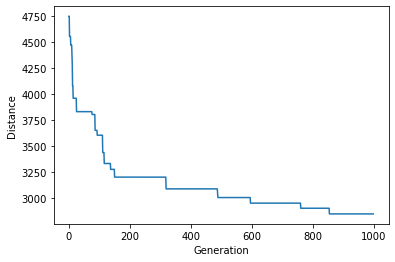

Best route so far: [ 4 28 41 13 10 20 46 12 18 45 23 22 36 14  8 11  7 24 49 40 31  1 15 43
 34  0 44 32 37  3  9 38 25 30 47 29 39 42 21  5 48 27 33 35 19  6 26 17
 16  2] with distance 2850.8376594890137


In [3]:
Nc = 50
cities = np.random.randint(low = 0, high = 200, size = (Nc, 2))

best_route, best_dist = GA(cities, N = 100, generations = 1000)
print(f'Best route so far: {best_route} with distance {best_dist}')

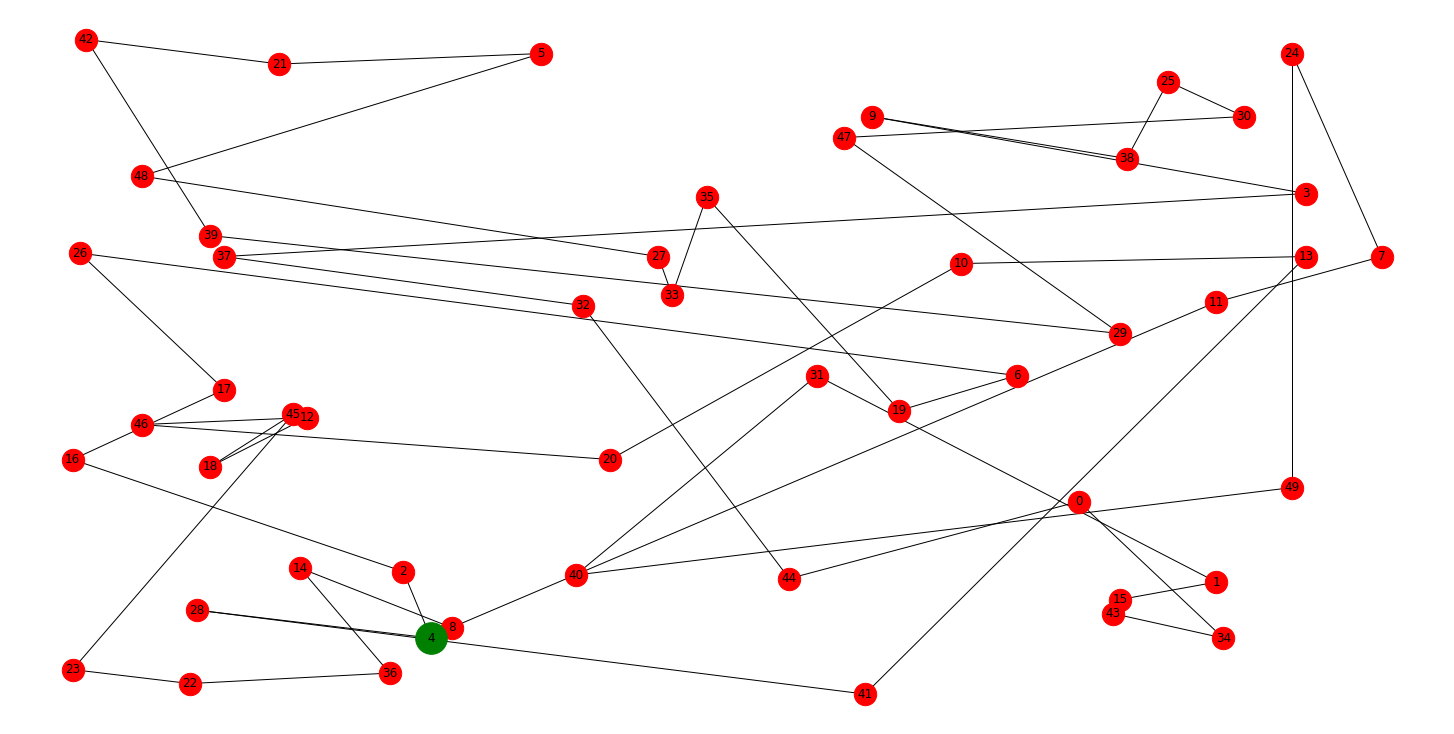

In [4]:
def plot_result(cities, best_route):
    dist_eucl = squareform(pdist(cities))
    edges  = []
    
    for i in range(len(best_route) - 1):
        s, e = best_route[i], best_route[i + 1]
        edges.append([s, e, dist_eucl[s, e]])
    # Go back to start location
    s, e = best_route[-1], best_route[0]
    edges.append([s, e, dist_eucl[s, e]])

    G = nx.Graph()
    G.add_nodes_from(range(len(cities)))
    G.add_weighted_edges_from(edges)
    pos = {k:v for k, v in enumerate(cities)}

    plt.figure(figsize=(20,10))
    nx.draw(G,with_labels=False, pos=pos,node_size=50)
    nx.draw_networkx_nodes(G, pos, node_color='r', node_size=500, alpha=1);
    nx.draw_networkx_nodes(G, pos, nodelist = [best_route[0]], node_color='g', node_size=1000, alpha=1);
    nx.draw_networkx_labels(G, pos, {k:k for k in range(len(cities))});
    
plot_result(cities, best_route)